In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df  = pd.read_csv('framingham.csv')

df.dropna(axis=0  , inplace=True)  # help to drop nan  Values
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [4]:
df1 = df.drop('education',axis=1)
df1

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [5]:
x = df1.drop('TenYearCHD',axis=1)
print(x)
y = df1['TenYearCHD']
y

      male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        1   39              0         0.0     0.0                0   
1        0   46              0         0.0     0.0                0   
2        1   48              1        20.0     0.0                0   
3        0   61              1        30.0     0.0                0   
4        0   46              1        23.0     0.0                0   
...    ...  ...            ...         ...     ...              ...   
4233     1   50              1         1.0     0.0                0   
4234     1   51              1        43.0     0.0                0   
4237     0   52              0         0.0     0.0                0   
4238     1   40              0         0.0     0.0                0   
4239     0   39              1        30.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
0                0         0    195.0  106.0   70.0  26.97       8

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 3658, dtype: int64

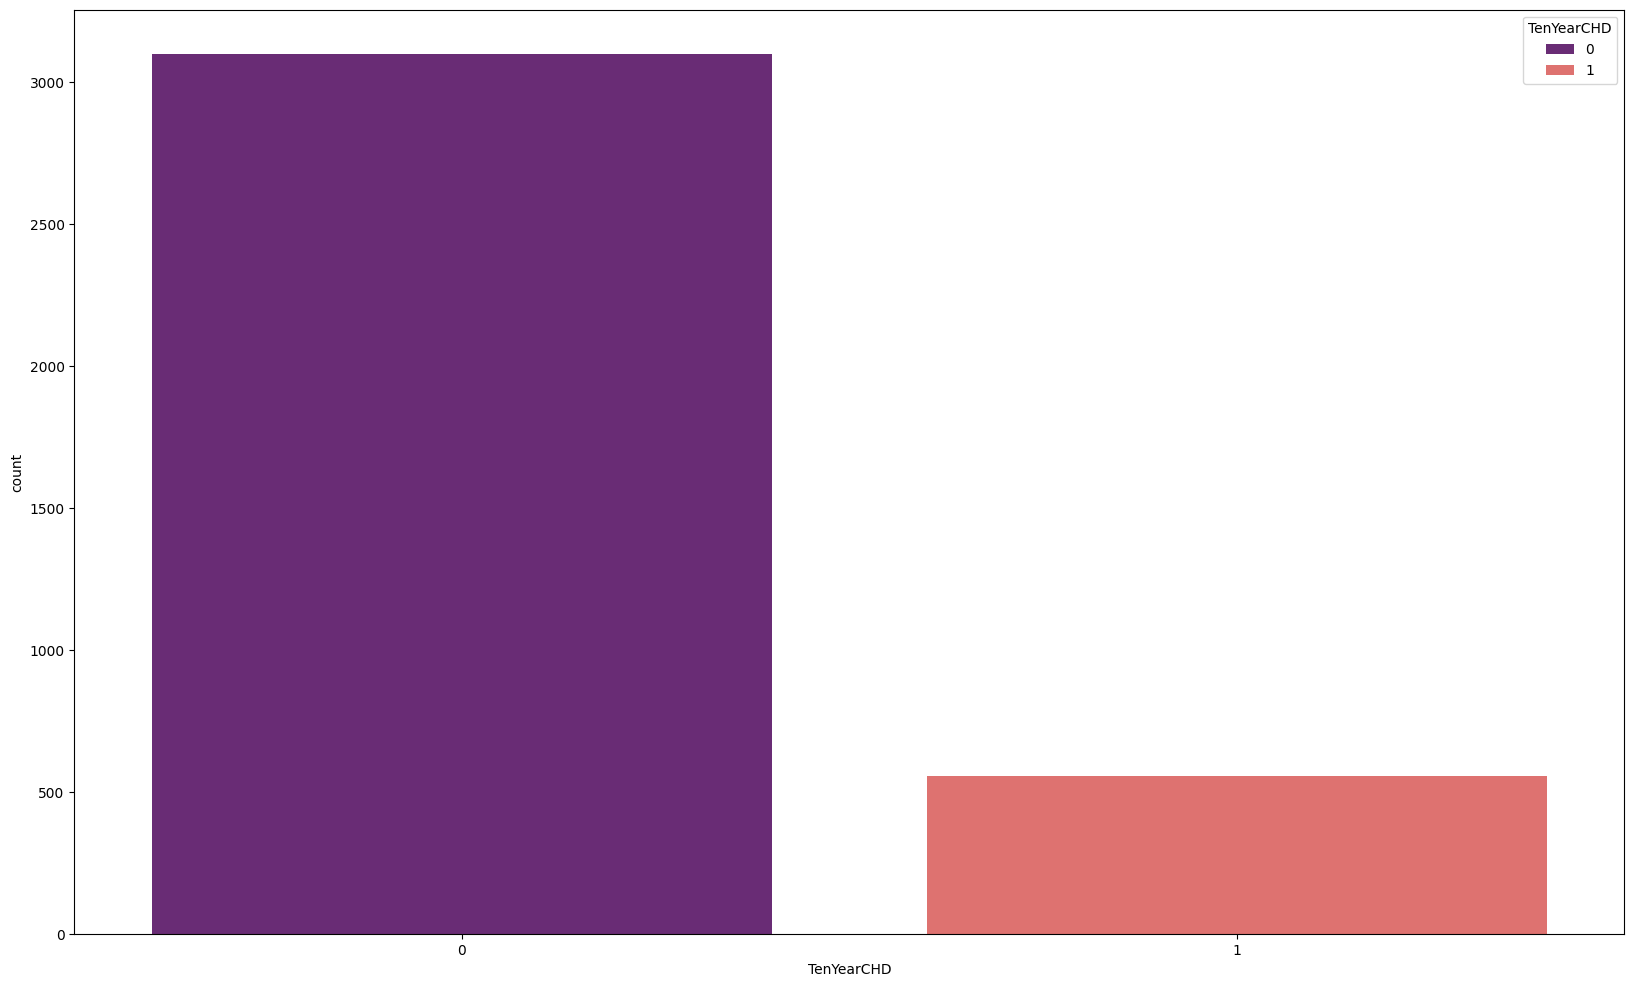

In [6]:
plt.figure(figsize=(20, 12))
sns.countplot(x='TenYearCHD', data=df1, hue='TenYearCHD', palette='magma')
plt.show()

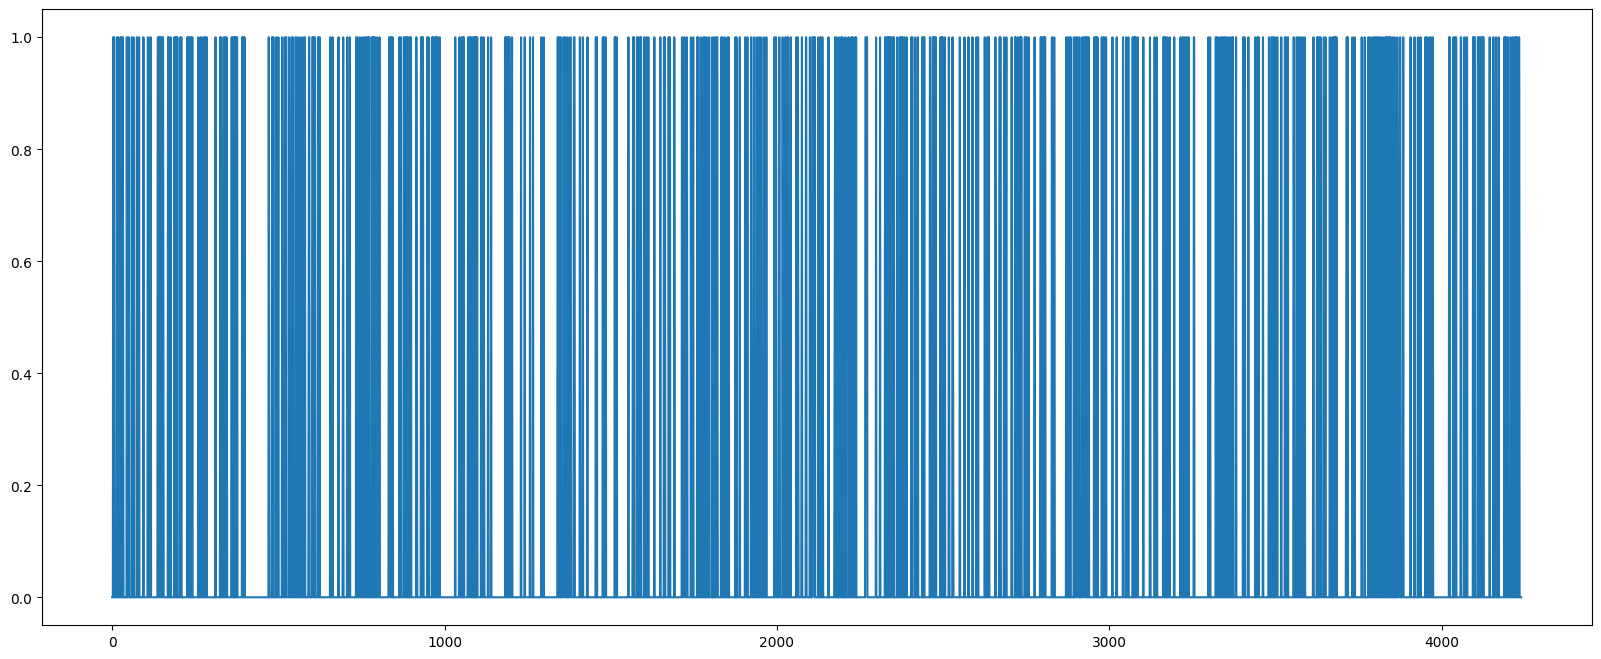

In [7]:
plt.figure(figsize=(20,8))
laste = df1['TenYearCHD'].plot()

plt.show(laste)

In [8]:
X_train , X_test ,y_train ,y_test = train_test_split(x , y , test_size= 0.3 , random_state= 44)


In [9]:
scaler  = StandardScaler()
x_train_scalar = scaler.fit_transform(X_train)
x_test_scalar = scaler.transform(X_test)

In [10]:
model =  LogisticRegression()
model.fit(x_train_scalar,y_train)

LogisticRegression()

In [11]:
y_predict = model.predict(x_test_scalar)

In [12]:
cnf  =  confusion_matrix(y_predict , y_test)

print(cnf)

acc  =  accuracy_score(y_predict,y_test)
print(acc)


[[922 160]
 [  6  10]]
0.848816029143898


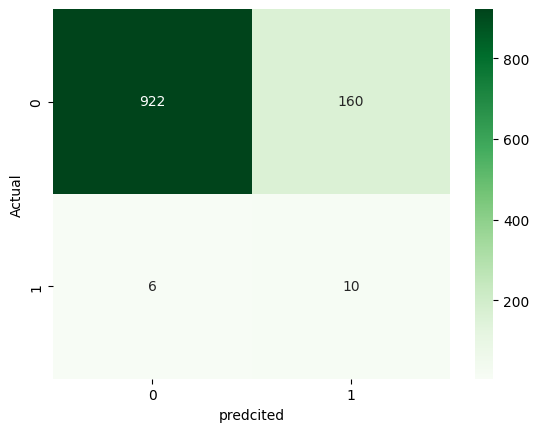

In [13]:
sns.heatmap(cnf, annot=True , fmt='d', cmap='Greens'  )
plt.xlabel("predcited")
plt.ylabel("Actual")
plt.show()